<a href="https://colab.research.google.com/github/fontanadaniel11/matplotlib/blob/main/grafici%20a%20barre%20colorate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
df = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv")

In [2]:
df

,area,reg,eta,totale_popolazione
0,ABR,Abruzzo,00-04,37923
1,ABR,Abruzzo,05-11,76431
2,ABR,Abruzzo,12-19,94727
3,ABR,Abruzzo,20-29,125230
4,ABR,Abruzzo,30-39,146965
...,...,...,...,...
205,VEN,Veneto,40-49,715790
206,VEN,Veneto,50-59,806474
207,VEN,Veneto,60-69,610635
208,VEN,Veneto,70-79,494721


1. il numero di record presente nel file

In [3]:
len(df)

210

2.  il numero di regioni presente nel file

In [4]:
len(set(df["reg"]))

21

3. il numero di abitanti di ogni regione. Ordinare in ordine decrescente sul numero di abitanti

In [5]:
df.groupby("reg")[["totale_popolazione"]].sum().sort_values(by="totale_popolazione", ascending = False)

,totale_popolazione
reg,
Lombardia,10222431
Lazio,5711206
Campania,5686251
Veneto,4833505
Sicilia,4797255
Emilia-Romagna,4436246
Piemonte,4198088
Puglia,3942290
Toscana,3687745


4.  la regione con il numero di abitanti più alto

In [6]:
dfreg = df.groupby("reg")[["totale_popolazione"]].sum().sort_values(by="totale_popolazione", ascending = False).reset_index()
dfreg

,reg,totale_popolazione
0,Lombardia,10222431
1,Lazio,5711206
2,Campania,5686251
3,Veneto,4833505
4,Sicilia,4797255
5,Emilia-Romagna,4436246
6,Piemonte,4198088
7,Puglia,3942290
8,Toscana,3687745
9,Calabria,1865009


In [7]:
dfreg[dfreg["totale_popolazione"] == dfreg["totale_popolazione"].max()][["reg"]]

,reg
0,Lombardia


5.  il numero medio di abitanti delle regioni

In [8]:
df2 = df.groupby("reg")[["totale_popolazione"]].sum().reset_index()
df2["totale_popolazione"].mean()

2833160.095238095

6.  le regioni che hanno più abitanti della media degli abitanti delle regioni

In [9]:
df2[df2["totale_popolazione"] > df2["totale_popolazione"].mean()][["reg"]]

,reg
3,Campania
4,Emilia-Romagna
6,Lazio
8,Lombardia
13,Piemonte
14,Puglia
16,Sicilia
17,Toscana
20,Veneto


7.  la regione che ha più abitanti nella fascia 12-19

In [10]:
eta = df[df["eta"] == "12-19"].groupby("reg")[["totale_popolazione"]].sum().sort_values(by="totale_popolazione", ascending = False).reset_index()
eta

,reg,totale_popolazione
0,Lombardia,794486
1,Campania,506070
2,Lazio,431221
3,Sicilia,401213
4,Veneto,379519
5,Emilia-Romagna,327410
6,Puglia,321188
7,Piemonte,310481
8,Toscana,270353
9,Calabria,147409


In [11]:
eta[eta["totale_popolazione"] == eta["totale_popolazione"].max()][["reg"]]

,reg
0,Lombardia


8.  il numero di abitanti per ogni fascia d'età

In [12]:
df.groupby("eta")[["totale_popolazione"]].sum()

,totale_popolazione
eta,
00-04,1846308
05-11,3656069
12-19,4620379
20-29,6040323
30-39,6782798
40-49,8781291
50-59,9619202
60-69,7531587
70-79,6016425


9.  la fascia d'età con più abitanti

In [13]:
eta_abitanti = df.groupby("eta")[["totale_popolazione"]].sum().sort_values(by="totale_popolazione", ascending = False).reset_index()
eta_abitanti[eta_abitanti["totale_popolazione"] == eta_abitanti["totale_popolazione"].max()][["eta"]]

,eta
0,50-59


10.   un grafico a barre orizzontali per l'esercizio 3

In [14]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'numero di abitati per ogni regione')

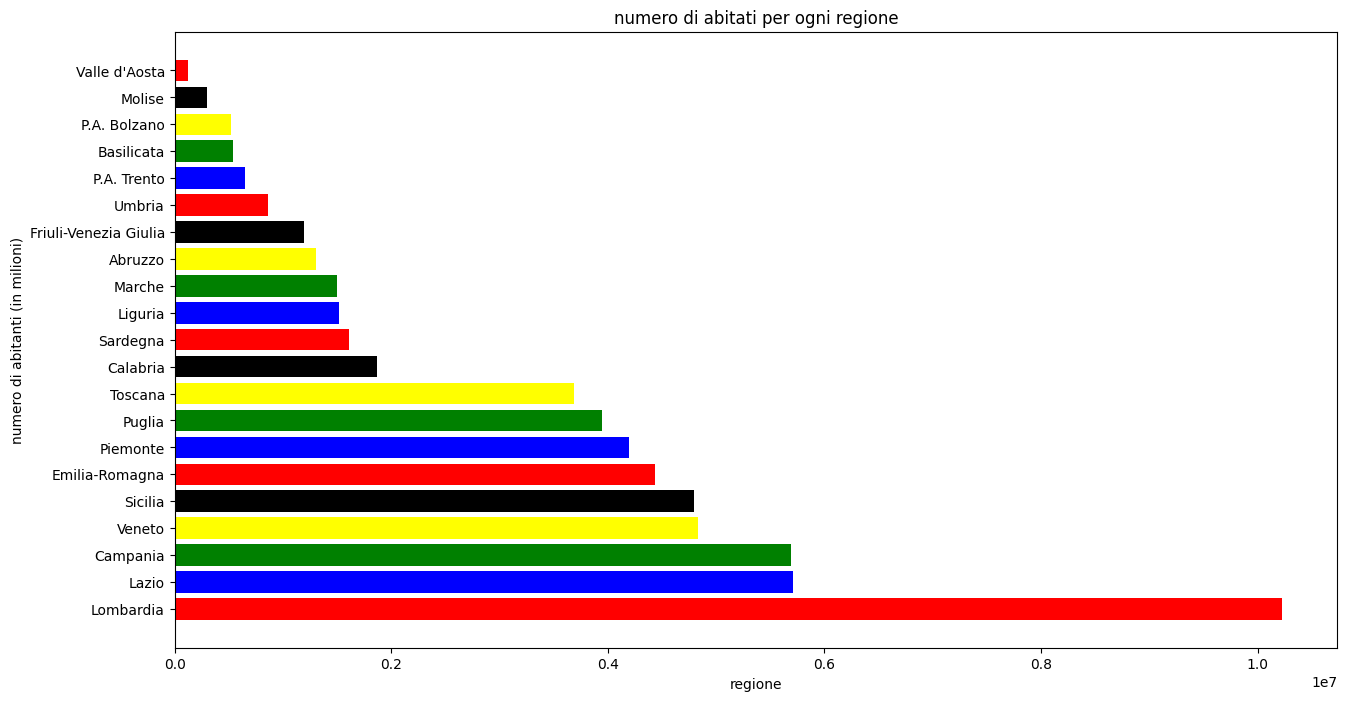

In [15]:
dati = df.groupby("reg")[["totale_popolazione"]].sum().sort_values(by="totale_popolazione", ascending = False).reset_index()
regioni = dati["reg"]
popolazioni = dati["totale_popolazione"]
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(regioni, popolazioni, label='numero di abitati per ogni regione', color = ["red", "blue", "green", "yellow", "black"])
ax.set_ylabel("numero di abitanti (in milioni)")
ax.set_xlabel("regione")
ax.set_title('numero di abitati per ogni regione')

11.  un grafico a barre verticali per l'esercizio 8

Text(0.5, 1.0, "numero di abitati per ogni fascia d'età")

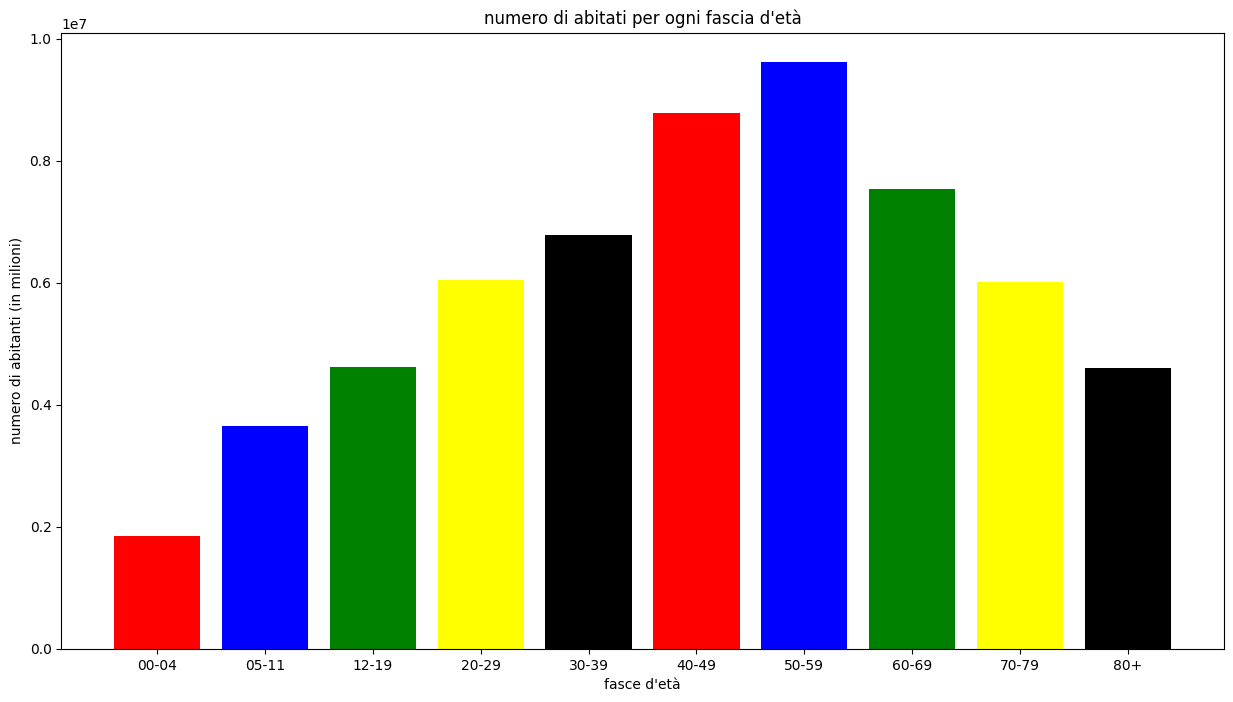

In [16]:
dati2 = df.groupby("eta")[["totale_popolazione"]].sum().reset_index()
fasce_eta = dati2["eta"]
popolazioni2 = dati2["totale_popolazione"]
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(fasce_eta, popolazioni2, label="numero di abitati per ogni fascia d'età", color = ["red", "blue", "green", "yellow", "black"])
ax.set_xlabel("fasce d'età")
ax.set_ylabel("numero di abitanti (in milioni)")
ax.set_title("numero di abitati per ogni fascia d'età")

12. un grafico a torta per l'esercizio 3 che riporti le percentuali

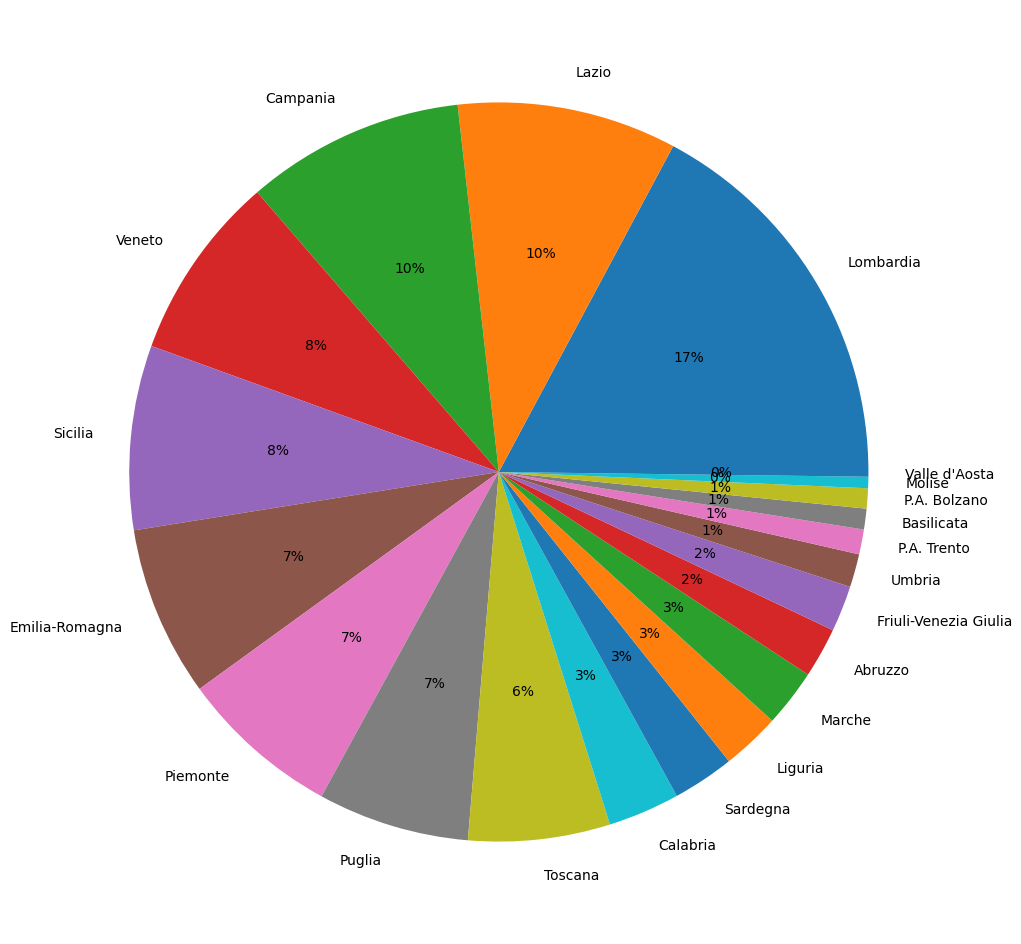

In [17]:
dati3 = df.groupby("reg")[["totale_popolazione"]].sum().sort_values(by="totale_popolazione", ascending = False).reset_index()
regioni2 = dati["reg"]
popolazioni3 = dati["totale_popolazione"]
plt.figure(figsize=(16, 12))
plt.pie(popolazioni3, labels=regioni2, autopct = '%1.0f%%') 
plt.show()